In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import json
from datetime import datetime

In [2]:
df_lst = []
for i in range(56):
    df_lst.append( pd.read_csv('./data/Kickstarter{:03d}.csv'.format(i)) )

In [3]:
df = pd.concat(df_lst, ignore_index=True)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 209222 entries, 0 to 209221
Data columns (total 37 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   backers_count             209222 non-null  int64  
 1   blurb                     209214 non-null  object 
 2   category                  209222 non-null  object 
 3   converted_pledged_amount  209222 non-null  int64  
 4   country                   209222 non-null  object 
 5   created_at                209222 non-null  int64  
 6   creator                   209222 non-null  object 
 7   currency                  209222 non-null  object 
 8   currency_symbol           209222 non-null  object 
 9   currency_trailing_code    209222 non-null  bool   
 10  current_currency          209222 non-null  object 
 11  deadline                  209222 non-null  int64  
 12  disable_communication     209222 non-null  bool   
 13  friends                   300 non-null     o

In [5]:
df.head()

,backers_count,blurb,category,converted_pledged_amount,country,created_at,creator,currency,currency_symbol,currency_trailing_code,...,slug,source_url,spotlight,staff_pick,state,state_changed_at,static_usd_rate,urls,usd_pledged,usd_type
0,21,2006 was almost 7 years ago.... Can you believ...,"{""id"":43,""name"":""Rock"",""slug"":""music/rock"",""po...",802,US,1387659690,"{""id"":1495925645,""name"":""Daniel"",""is_registere...",USD,$,True,...,new-final-round-album,https://www.kickstarter.com/discover/categorie...,True,False,successful,1391899046,1.000000,"{""web"":{""project"":""https://www.kickstarter.com...",802.00000,international
1,97,An adorable fantasy enamel pin series of princ...,"{""id"":54,""name"":""Mixed Media"",""slug"":""art/mixe...",2259,US,1549659768,"{""id"":1175589980,""name"":""Katherine"",""slug"":""fr...",USD,$,True,...,princess-pals-enamel-pin-series,https://www.kickstarter.com/discover/categorie...,True,False,successful,1551801611,1.000000,"{""web"":{""project"":""https://www.kickstarter.com...",2259.00000,international
2,88,Helping a community come together to set the s...,"{""id"":280,""name"":""Photobooks"",""slug"":""photogra...",29638,US,1477242384,"{""id"":1196856269,""name"":""MelissaThomas"",""is_re...",USD,$,True,...,their-life-through-their-lens-the-amish-and-me...,https://www.kickstarter.com/discover/categorie...,True,True,successful,1480607932,1.000000,"{""web"":{""project"":""https://www.kickstarter.com...",29638.00000,international
3,193,Every revolution starts from the bottom and we...,"{""id"":266,""name"":""Footwear"",""slug"":""fashion/fo...",49158,IT,1540369920,"{""id"":1569700626,""name"":""WAO"",""slug"":""wearewao...",EUR,€,False,...,wao-the-eco-effect-shoes,https://www.kickstarter.com/discover/categorie...,True,False,successful,1544309940,1.136525,"{""web"":{""project"":""https://www.kickstarter.com...",49075.15252,international
4,20,Learn to build 10+ Applications in this comple...,"{""id"":51,""name"":""Software"",""slug"":""technology/...",549,US,1425706517,"{""id"":1870845385,""name"":""Kalpit Jain"",""is_regi...",USD,$,True,...,apple-watch-development-course,https://www.kickstarter.com/discover/categorie...,False,False,failed,1428511019,1.000000,"{""web"":{""project"":""https://www.kickstarter.com...",549.00000,domestic


# Data exploration

## Feature overview

| Column | Description | Dtype | Null | EDA status |
| - | - | - | - | - |
| `backers_count` | The number of participants of the kickstarter project | | | Done |
| `blurb` | Short description of the project by the project initiator. Max 135 characters. | | | Done | 
| `category` | Dictionary object. \n Contains `id, name, slug, position, parent_id, color, urls` | | | Open |
| `converted_pledged_amount` | Open | | | Open |
| `country` | Country of of Kickstarter account (?) | | | To be confirmed |
| `created_at`| Creation date of the project. UNIX time format | | | Done |
| `creator`| Dictionary of user details `id, name, is_registered, chosen_currency, ... | | | Open to list all dictionary entries|
| `currency`| Currency (3-digit code) by which the project is founded | | | Done |
| `currency_symbol`| Symbol related to `currency` feature. | | | Done |
| `currency_trailing_code`| | Bool | | Open |
| `current_currency`| Open | | | Open |
| `deadline`| Deadline of the project. UNIX time format | | | |
| `disable_communication`| Is the communication with the creator allowed? | Bool | | Done |
| `friends`| 300 entries with empty list object | | | See '300 question' |
| `fx_rate`| Open | | | Open. Currency topic. |
| `goal`| Target amount | | | By how much deviate the projects from the target? (successful vs. failed) |
| `id`| Intern kickstarter id | | | See '182-anomalia' |
| `is_backing`| 300 instances of 'False' | | | See '300 question' |
| `is_starrable`| Open | Bool | None | Open |
| `is_starred`| Open | | 298 False, 2 True | See '300 question' |
| `launched_at`| Date of publication on kickstarter | int64 | None | Done |
| `location`| Dictionary of location details | String | 208996 filled | Open |
| `name`| Project name. Limited to 60 chars. | String | 209222 filled | Open |
| `permissions`| 300 entries with empty list object ||| See '300 question' |
| `photo`| Dictionary of photo url, ...  | String | | See '182-anomalia' |
| `pledged`|||||
| `profile`|||||
| `slug`|||||
| `source_url`|||||
| `spotlight`|||||
| `staff_pick`|||||
| `state`|||||
| `state_changed_at`|||||
| `static_usd_rate`|||||
| `urls`|||||
| `usd_pledged`|||||
| `usd_type` |||||

## Target classes and balance

In [6]:
df['state'].value_counts()

successful    117465
failed         75199
canceled        8624
live            7311
suspended        623
Name: state, dtype: int64

There are 

## Date time

In [7]:
pd.to_datetime(df['state_changed_at'], unit='s').describe(datetime_is_numeric=True)

count                           209222
mean     2016-05-09 23:50:25.225296640
min                2009-05-03 07:00:17
25%      2015-01-05 19:16:23.750000128
50%                2016-05-31 15:31:38
75%                2018-02-23 06:04:15
max                2019-03-14 04:12:21
Name: state_changed_at, dtype: object

## Country

In [8]:
ratio = lambda x: 100*round(x.value_counts()['successful'] / (x.value_counts()['successful'] + x.value_counts()['failed'] + x.value_counts()['canceled']), 4)

In [9]:
success_per_country = pd.pivot_table(df, index='country', values='state', aggfunc=ratio).rename(columns={'state':'success_ratio'}).sort_values(by='success_ratio', ascending=False)
success_per_country

,success_ratio
country,
HK,76.70
JP,73.19
LU,66.07
SG,64.20
GB,62.69
US,59.49
DK,57.76
NZ,55.53
CA,55.10


<AxesSubplot:xlabel='success_ratio', ylabel='country'>

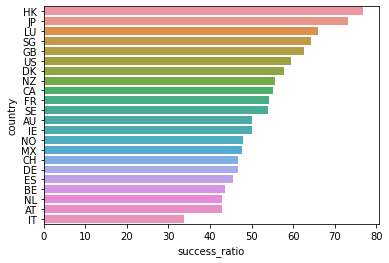

In [10]:
from matplotlib.pyplot import xcorr
sns.barplot(data=success_per_country.reset_index(), y='country', x='success_ratio')

## Category

In [11]:
print(df.category[0])
print(df.category[1000])
print(df.category[20000])
print(df.category[200000])

{"id":43,"name":"Rock","slug":"music/rock","position":17,"parent_id":14,"color":10878931,"urls":{"web":{"discover":"http://www.kickstarter.com/discover/categories/music/rock"}}}
{"id":52,"name":"Hardware","slug":"technology/hardware","position":8,"parent_id":16,"color":6526716,"urls":{"web":{"discover":"http://www.kickstarter.com/discover/categories/technology/hardware"}}}
{"id":22,"name":"Illustration","slug":"art/illustration","position":4,"parent_id":1,"color":16760235,"urls":{"web":{"discover":"http://www.kickstarter.com/discover/categories/art/illustration"}}}
{"id":262,"name":"Accessories","slug":"fashion/accessories","position":1,"parent_id":9,"color":16752598,"urls":{"web":{"discover":"http://www.kickstarter.com/discover/categories/fashion/accessories"}}}


## Amounts: converted_pledged_amount, exchange rate

In [12]:
currency_delta = df['converted_pledged_amount'].astype(float) - df['usd_pledged'] * df['static_usd_rate']
currency_delta.describe()

count    2.092220e+05
mean    -8.551623e+01
std      1.270609e+04
min     -1.771501e+06
25%      0.000000e+00
50%      0.000000e+00
75%      0.000000e+00
max      9.330207e+05
dtype: float64

In [13]:
currency_cols = ['country', 'converted_pledged_amount', 'currency', 'currency_symbol', 'fx_rate', 'usd_pledged', 'usd_type']
df[currency_delta > 900][currency_cols].head(2)

,country,converted_pledged_amount,currency,currency_symbol,fx_rate,usd_pledged,usd_type
56,SG,19699,SGD,$,0.737115,19338.586040,international
83,NO,2182,NOK,kr,0.115720,2088.859902,domestic


In [14]:
df.currency_trailing_code

0          True
1          True
2          True
3         False
4          True
          ...  
209217     True
209218     True
209219     True
209220     True
209221    False
Name: currency_trailing_code, Length: 209222, dtype: bool

## Creator

In [15]:
print(df.creator[2])
print(df.creator[2000])
print(df.creator[200000])

{"id":1196856269,"name":"MelissaThomas","is_registered":null,"chosen_currency":null,"avatar":{"thumb":"https://ksr-ugc.imgix.net/assets/014/275/164/5a43d683fe375d78f111a3b975b1776d_original.jpg?ixlib=rb-1.1.0&w=40&h=40&fit=crop&v=1477513389&auto=format&frame=1&q=92&s=dc9207376e0c0d43f32031d8e9a281cf","small":"https://ksr-ugc.imgix.net/assets/014/275/164/5a43d683fe375d78f111a3b975b1776d_original.jpg?ixlib=rb-1.1.0&w=160&h=160&fit=crop&v=1477513389&auto=format&frame=1&q=92&s=fcbeca6ca421aa49cd0ab3467666026d","medium":"https://ksr-ugc.imgix.net/assets/014/275/164/5a43d683fe375d78f111a3b975b1776d_original.jpg?ixlib=rb-1.1.0&w=160&h=160&fit=crop&v=1477513389&auto=format&frame=1&q=92&s=fcbeca6ca421aa49cd0ab3467666026d"},"urls":{"web":{"user":"https://www.kickstarter.com/profile/1196856269"},"api":{"user":"https://api.kickstarter.com/v1/users/1196856269?signature=1552621253.9f2e97a20efddf347cd2610cc3c200244cc8525f"}}}
{"id":1258230290,"name":"Shinz Productions","is_registered":null,"chosen_cu

## JSON objects

In [16]:
cols_object = df.select_dtypes(include='object').columns
cols_object

Index(['blurb', 'category', 'country', 'creator', 'currency',
       'currency_symbol', 'current_currency', 'friends', 'is_backing',
       'is_starred', 'location', 'name', 'permissions', 'photo', 'profile',
       'slug', 'source_url', 'state', 'urls', 'usd_type'],
      dtype='object')

In [17]:
cols_json= [x for x in cols_object if any(df[x].astype(str).str.contains('{\"'))]

In [18]:
df[cols_json].head(2)

,category,creator,location,photo,profile,urls
0,"{""id"":43,""name"":""Rock"",""slug"":""music/rock"",""po...","{""id"":1495925645,""name"":""Daniel"",""is_registere...","{""id"":2379574,""name"":""Chicago"",""slug"":""chicago...","{""key"":""assets/011/625/534/5bea1760d7f20943c4c...","{""id"":822687,""project_id"":822687,""state"":""inac...","{""web"":{""project"":""https://www.kickstarter.com..."
1,"{""id"":54,""name"":""Mixed Media"",""slug"":""art/mixe...","{""id"":1175589980,""name"":""Katherine"",""slug"":""fr...","{""id"":2486340,""name"":""Sacramento"",""slug"":""sacr...","{""key"":""assets/024/033/030/dea4e3901d10195b035...","{""id"":3665299,""project_id"":3665299,""state"":""in...","{""web"":{""project"":""https://www.kickstarter.com..."


In [19]:
problem_lst = []
for col in cols_json:
    print(col)
    for i, val in df[col].items():
        try:
            test = json.loads(val)
        except:
            problem_lst.append((col, i, val))
    print(len(problem_lst))
    print()

category
0

creator
579

location
805

photo
805

profile
4695

urls
4695



In [20]:
df_dicts = pd.DataFrame()
for col in cols_json:
    print(col)
    c = []
    for i, val in df[col].items():
        try:
            c.append(json.loads(val))
        except:
            c.append(np.NaN)
    df_dicts[col] = pd.Series(np.array(c))

category
creator
location
photo
profile
urls


In [21]:
df_dicts.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 209222 entries, 0 to 209221
Data columns (total 6 columns):
 #   Column    Non-Null Count   Dtype 
---  ------    --------------   ----- 
 0   category  209222 non-null  object
 1   creator   208643 non-null  object
 2   location  208996 non-null  object
 3   photo     209222 non-null  object
 4   profile   205332 non-null  object
 5   urls      209222 non-null  object
dtypes: object(6)
memory usage: 9.6+ MB


In [22]:
df_expanded = df_dicts['creator'].apply(pd.Series).add_prefix('creator_')

In [23]:
df_expanded.head()

,creator_0,creator_avatar,creator_chosen_currency,creator_id,creator_is_registered,creator_name,creator_slug,creator_urls
0,NaN,{'thumb': 'https://ksr-ugc.imgix.net/assets/00...,NaN,1.495926e+09,NaN,Daniel,NaN,{'web': {'user': 'https://www.kickstarter.com/...
1,NaN,{'thumb': 'https://ksr-ugc.imgix.net/assets/02...,NaN,1.175590e+09,NaN,Katherine,freckleddisney,{'web': {'user': 'https://www.kickstarter.com/...
2,NaN,{'thumb': 'https://ksr-ugc.imgix.net/assets/01...,NaN,1.196856e+09,NaN,MelissaThomas,NaN,{'web': {'user': 'https://www.kickstarter.com/...
3,NaN,{'thumb': 'https://ksr-ugc.imgix.net/assets/02...,NaN,1.569701e+09,NaN,WAO,wearewao,{'web': {'user': 'https://www.kickstarter.com/...
4,NaN,{'thumb': 'https://ksr-ugc.imgix.net/assets/00...,NaN,1.870845e+09,NaN,Kalpit Jain,NaN,{'web': {'user': 'https://www.kickstarter.com/...


In [25]:
def get_json_cols(data):
    cols_object = df.select_dtypes(include='object').columns
    return [x for x in cols_object if any(data[x].astype(str).str.contains('{\"'))]

In [26]:
def create_dicts_from_json(data, cols_json):
    data_dicts = pd.DataFrame()
    for col in cols_json:
        print('Parsing json in: '+col)
        c = []
        for i, val in data[col].items():
            try:
                c.append(json.loads(val))
            except:
                c.append(dict())
        data_dicts[col] = pd.Series(np.array(c))
    return data_dicts

In [27]:
def create_cols_from_dicts(data_dicts):
    data_expanded = []
    for col in data_dicts.columns:
        print('Expanding: '+col)
        data_expanded.append(pd.json_normalize(data_dicts[col]).add_prefix(col+'_'))
    return pd.concat(data_expanded, axis=1)

In [28]:
def save_dataframe(data):
    t = datetime.now().strftime("%Y-%m-%d_%H%M%S")
    e = f"./data_frame_{t}.pickle"
    print('Saving: '+e)
    data.to_pickle(e)

In [29]:
def expand_json(data, save=True):
    #from datetime import datetime
    cols_json = get_json_cols(data)
    print('---------- Parsing json ------------')
    data_dicts = create_dicts_from_json(data, cols_json)
    print('---------- Expanding dictionaries --------')
    data_expanded = create_cols_from_dicts(data_dicts)
    print('---------- Merge to final data frame ------')
    data_merged = pd.concat([data.drop(cols_json, axis=1), data_expanded], axis=1)
    if save:
        print('---------- Saving to pickle ------')
        save_dataframe(data_merged)
    return data_merged

In [30]:
df_new = expand_json(df)

---------- Parsing json ------------
Parsing json in: category
Parsing json in: creator
Parsing json in: location
Parsing json in: photo
Parsing json in: profile
Parsing json in: urls
---------- Expanding dictionaries --------
Expanding: category
Expanding: creator
Expanding: location
Expanding: photo
Expanding: profile
Expanding: urls
---------- Merge to final data frame ------
---------- Saving to pickle ------
Saving: ./data_frame_2021-03-11_143806.pickle


In [31]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 209222 entries, 0 to 209221
Data columns (total 96 columns):
 #   Column                                                        Non-Null Count   Dtype  
---  ------                                                        --------------   -----  
 0   backers_count                                                 209222 non-null  int64  
 1   blurb                                                         209214 non-null  object 
 2   converted_pledged_amount                                      209222 non-null  int64  
 3   country                                                       209222 non-null  object 
 4   created_at                                                    209222 non-null  int64  
 5   currency                                                      209222 non-null  object 
 6   currency_symbol                                               209222 non-null  object 
 7   currency_trailing_code                                  

In [32]:
df_new['duration'] = (df_new.deadline-df_new.launched_at)/(3600*24)
df_new['duration'] = df_new['duration'].round(2)

In [33]:
df_new['goal_usd'] = df_new['goal'] * df_new['static_usd_rate']
df_new['goal_usd'] = df_new['goal_usd'].round(2)

In [34]:
df_new['duration'].head()

0    45.00
1    20.00
2    30.04
3    41.96
4    30.00
Name: duration, dtype: float64

In [35]:
df_new['goal_usd'].argmax()

60060

In [36]:
df_new.iloc[60060,:]['urls_web.project']

'https://www.kickstarter.com/projects/245190432/a-celtic-lovestory?ref=discovery_category_newest'

In [37]:
for i , val in df_new.iloc[60060,:].items():
    print(i)
    print(val)
    print()

backers_count
0

blurb
A 2000 year old "Romeo & Juliet" love story, set amidst the dramatic changes that ripped through Celtic Britain when Rome invaded...

converted_pledged_amount
0

country
GB

created_at
1446156106

currency
GBP

currency_symbol
£

currency_trailing_code
False

current_currency
USD

deadline
1448920860

disable_communication
False

friends
nan

fx_rate
1.32567974

goal
100000000.0

id
2000749004

is_backing
nan

is_starrable
False

is_starred
nan

launched_at
1447717635

name
A Celtic Lovestory

permissions
nan

pledged
0.0

slug
a-celtic-lovestory

source_url
https://www.kickstarter.com/discover/categories/film%20&%20video/drama

spotlight
False

staff_pick
False

state
failed

state_changed_at
1448920860

static_usd_rate
1.52350076

usd_pledged
0.0

usd_type
international

category_id
293

category_name
Drama

category_slug
film & video/drama

category_position
5

category_parent_id
11.0

category_color
16734574

category_urls.web.discover
http://www.kickstarter.

In [38]:
df_new['location_type'].unique()

array(['Town', 'Suburb', 'County', 'LocalAdmin', 'Estate', 'Zip',
       'Country', nan, 'Island', 'Miscellaneous'], dtype=object)

In [41]:
df_new['launched_at_full'] = pd.to_datetime(df_new['launched_at'], unit='s')
df_new['launched_at_year'] = pd.DatetimeIndex(df_new['launched_at_full']).year
df_new['launched_at_month'] = pd.DatetimeIndex(df_new['launched_at_full']).month

In [56]:
test = list(df_new.columns)
test

['backers_count',
 'blurb',
 'converted_pledged_amount',
 'country',
 'created_at',
 'currency',
 'currency_symbol',
 'currency_trailing_code',
 'current_currency',
 'deadline',
 'disable_communication',
 'friends',
 'fx_rate',
 'goal',
 'id',
 'is_backing',
 'is_starrable',
 'is_starred',
 'launched_at',
 'name',
 'permissions',
 'pledged',
 'slug',
 'source_url',
 'spotlight',
 'staff_pick',
 'state',
 'state_changed_at',
 'static_usd_rate',
 'usd_pledged',
 'usd_type',
 'category_id',
 'category_name',
 'category_slug',
 'category_position',
 'category_parent_id',
 'category_color',
 'category_urls.web.discover',
 'creator_id',
 'creator_name',
 'creator_is_registered',
 'creator_chosen_currency',
 'creator_avatar.thumb',
 'creator_avatar.small',
 'creator_avatar.medium',
 'creator_urls.web.user',
 'creator_urls.api.user',
 'creator_slug',
 'location_id',
 'location_name',
 'location_slug',
 'location_short_name',
 'location_displayable_name',
 'location_localized_name',
 'location_

In [58]:
survival_lst = ['blurb', 'country', 'created_at', 'currency', 'deadline','disable_communication', 'goal', 'launched_at','name', 'staff_pick','state', 'usd_pledged','usd_type','category_id','category_name','category_slug','category_parent_id', 'location_id', 'location_name','location_type', 'photo_key', 'photo_full', 'duration', 'goal_usd', 'launched_at_full', 'launched_at_year', 'launched_at_month']

In [59]:
df_eda = df_new[survival_lst]

In [60]:
df_eda.head()

,blurb,country,created_at,currency,deadline,disable_communication,goal,launched_at,name,staff_pick,...,location_id,location_name,location_type,photo_key,photo_full,duration,goal_usd,launched_at_full,launched_at_year,launched_at_month
0,2006 was almost 7 years ago.... Can you believ...,US,1387659690,USD,1391899046,False,200.0,1388011046,New Final Round Album,False,...,2379574.0,Chicago,Town,assets/011/625/534/5bea1760d7f20943c4cd5e9b491...,https://ksr-ugc.imgix.net/assets/011/625/534/5...,45.00,200.0,2013-12-25 22:37:26,2013,12
1,An adorable fantasy enamel pin series of princ...,US,1549659768,USD,1551801611,False,400.0,1550073611,Princess Pals Enamel Pin Series,False,...,2486340.0,Sacramento,Town,assets/024/033/030/dea4e3901d10195b035875eb8cf...,https://ksr-ugc.imgix.net/assets/024/033/030/d...,20.00,400.0,2019-02-13 16:00:11,2019,2
2,Helping a community come together to set the s...,US,1477242384,USD,1480607930,False,27224.0,1478012330,Their Life Through Their Lens-the Amish and Me...,True,...,2383660.0,Columbus,Town,assets/014/262/672/97944960ba30239051d3b6e59f2...,https://ksr-ugc.imgix.net/assets/014/262/672/9...,30.04,27224.0,2016-11-01 14:58:50,2016,11
3,Every revolution starts from the bottom and we...,IT,1540369920,EUR,1544309940,False,40000.0,1540684582,WAO: THE ECO EFFECT SHOES,False,...,725746.0,Venice,Town,assets/023/008/626/aef53e2f326ad4c87729001f643...,https://ksr-ugc.imgix.net/assets/023/008/626/a...,41.96,45461.0,2018-10-27 23:56:22,2018,10
4,Learn to build 10+ Applications in this comple...,US,1425706517,USD,1428511017,False,1000.0,1425919017,Apple Watch Development Course,False,...,2479651.0,Redmond,Town,assets/012/061/410/1687a735d5b1316ca4761b087ca...,https://ksr-ugc.imgix.net/assets/012/061/410/1...,30.00,1000.0,2015-03-09 16:36:57,2015,3


In [63]:
df_eda.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 209222 entries, 0 to 209221
Data columns (total 27 columns):
 #   Column                 Non-Null Count   Dtype         
---  ------                 --------------   -----         
 0   blurb                  209214 non-null  object        
 1   country                209222 non-null  object        
 2   created_at             209222 non-null  int64         
 3   currency               209222 non-null  object        
 4   deadline               209222 non-null  int64         
 5   disable_communication  209222 non-null  bool          
 6   goal                   209222 non-null  float64       
 7   launched_at            209222 non-null  int64         
 8   name                   209222 non-null  object        
 9   staff_pick             209222 non-null  bool          
 10  state                  209222 non-null  object        
 11  usd_pledged            209222 non-null  float64       
 12  usd_type               208742 non-null  obje